In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from astropy.table import Table, vstack
from astroquery.gaia import Gaia

import pickle
import galsim

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [18]:
t = Table.read('tab2.csv')

In [19]:
t

source_id,ra,dec,teff_val,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,name,sdss_r_mag
int64,float64,float64,float64,float64,float64,float64,str7,float64
6714384736763101568,289.45026166614076,-41.10564476605178,--,17.69072151184082,18.10324478149414,17.121496200561523,R00_SW0,17.65066909790039
6714383538469715328,289.48280689959796,-41.1735273573949,4826.33349609375,15.144917488098145,15.7452392578125,14.408154487609863,R00_SW0,15.111298561096191
6714382812617852416,289.3426247910866,-41.07799055239632,--,17.436628341674805,17.90690040588379,16.803550720214844,R00_SW0,17.393184661865234
6714381541307349632,289.32638903844787,-41.1343609104819,--,17.186864852905273,17.314706802368164,16.933862686157227,R00_SW0,17.22844696044922
6714384358805813376,289.46738741165643,-41.15798207104609,5360.66650390625,16.038482666015625,16.4374942779541,15.469897270202637,R00_SW0,15.999167442321777
6714382645113304064,289.2846844443523,-41.09002301515201,--,17.4923038482666,18.119552612304688,16.494121551513672,R00_SW0,17.50521469116211
6714382675178910976,289.28330429428576,-41.07527444451038,--,17.9594783782959,18.358116149902344,17.37221908569336,R00_SW0,17.91922378540039
6714384702403329664,289.43670796842,-41.11649853202259,--,17.717927932739258,18.1076717376709,17.13102912902832,R00_SW0,17.678133010864258
6714384393165596032,289.4740503422572,-41.14275069824055,--,17.801319122314453,18.139202117919922,17.2364559173584,R00_SW0,17.766246795654297


In [20]:
cols = sns.color_palette("hls", 8)

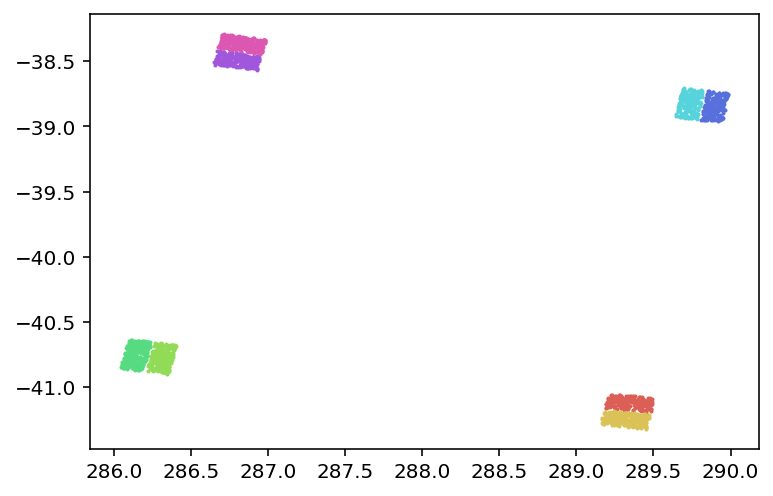

In [22]:
for i,name in enumerate(np.unique(t['name'])):
    sub = t[[t['name'] == name]]
    plt.scatter(sub['ra'], sub['dec'], color=cols[i], s=1)

(array([  1.,   3.,   2.,  11.,  35., 100., 175., 343., 706., 620.]),
 array([ 7.91833258,  8.97551723, 10.03270187, 11.08988652, 12.14707117,
        13.20425582, 14.26144047, 15.31862512, 16.37580976, 17.43299441,
        18.49017906]),
 <a list of 10 Patch objects>)

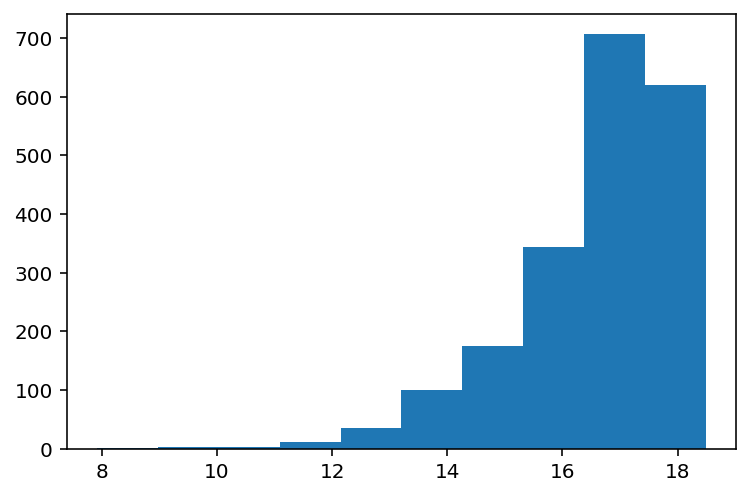

In [24]:
plt.hist(t['sdss_r_mag'])

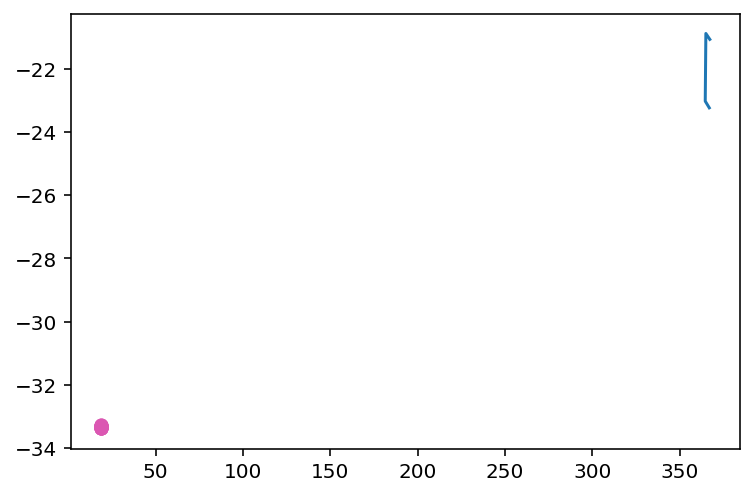

In [7]:
sub = t[[t['name'] == 'R44_SW1']]
plt.scatter(sub['ra'], sub['dec'], color=cols[i])
ras = np.array([7.2902166, 5.02911286, 4.67346809, 6.98421589]) 
decs = np.array([-21.0683195, -20.88207996, -23.02338886, -23.23420457])
plt.plot(ras+360, decs)

# Check Sensors

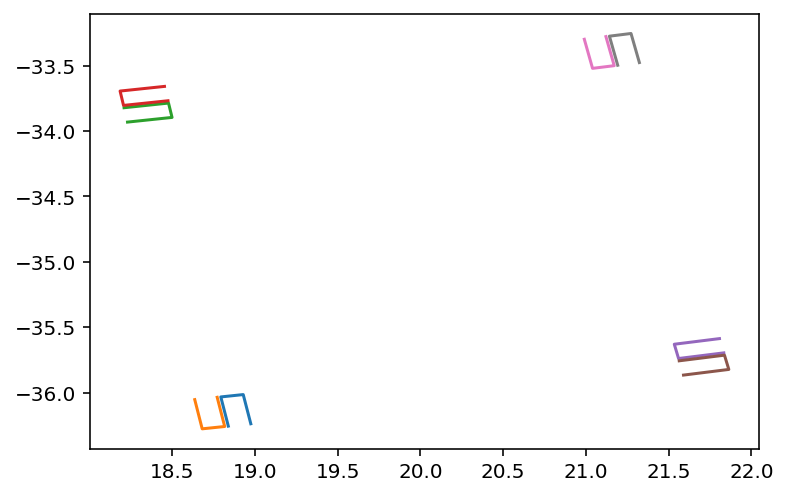

In [17]:
class FocalPlane:
    """
    Keeps track of intra and extra-focal chips positions in focal plane.
    """
    def __init__(self):
        chips = pickle.load(open('chips.pkl', 'rb'))
        self.wavefront_sensors = {k: v for (k,v) in chips.items() if 'SW' in k}
        
q = 80 * galsim.degrees
boresight = galsim.CelestialCoord(20.0013240222721 * galsim.degrees, -34.772273718074 * galsim.degrees)
fp = FocalPlane()
cq, sq = np.cos(q), np.sin(q)
affine = galsim.AffineTransform(cq, -sq, sq, cq)
wcs = galsim.TanWCS(
            affine,
            boresight,
            units=galsim.radians
        )

for k,v in fp.wavefront_sensors.items():
    corners = np.array(v['corners_field'])
    ra,dec = wcs.toWorld(corners[:,0], corners[:,1], units=galsim.degrees)
    plt.plot(ra, dec)

# Check Query